In [1]:
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Data Cleaning Listings/FINAL_TRAIN_DATA_PARIS.csv'
#read data, and quickly check if it is correctly read in
train_data_paris= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Data Cleaning Listings/FINAL_VALID_DATA_PARIS.csv'
#read data, and quickly check if it is correctly read in
valid_data_paris= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Data Cleaning Listings/FINAL_TEST_DATA_PARIS.csv'
#read data, and quickly check if it is correctly read in
test_data_paris= pd.read_csv(file_path)

### Feature engineering

In [2]:
train_data_paris.info()
valid_data_paris.info()
test_data_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666704 entries, 0 to 1666703
Columns: 127 entries, id to kitchen_amenities
dtypes: bool(97), float64(10), int64(19), object(1)
memory usage: 535.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182449 entries, 0 to 182448
Columns: 127 entries, id to kitchen_amenities
dtypes: bool(97), float64(10), int64(19), object(1)
memory usage: 58.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184704 entries, 0 to 184703
Columns: 127 entries, id to kitchen_amenities
dtypes: bool(97), float64(10), int64(19), object(1)
memory usage: 59.4+ MB


In [3]:
import pandas as pd

# Assuming train_data_paris, valid_data_paris, and test_data_paris are already defined

# Concatenate the datasets
combined_data = pd.concat([train_data_paris, valid_data_paris, test_data_paris], ignore_index=True)

# Display information about the combined dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033857 entries, 0 to 2033856
Columns: 127 entries, id to kitchen_amenities
dtypes: bool(97), float64(10), int64(19), object(1)
memory usage: 653.7+ MB


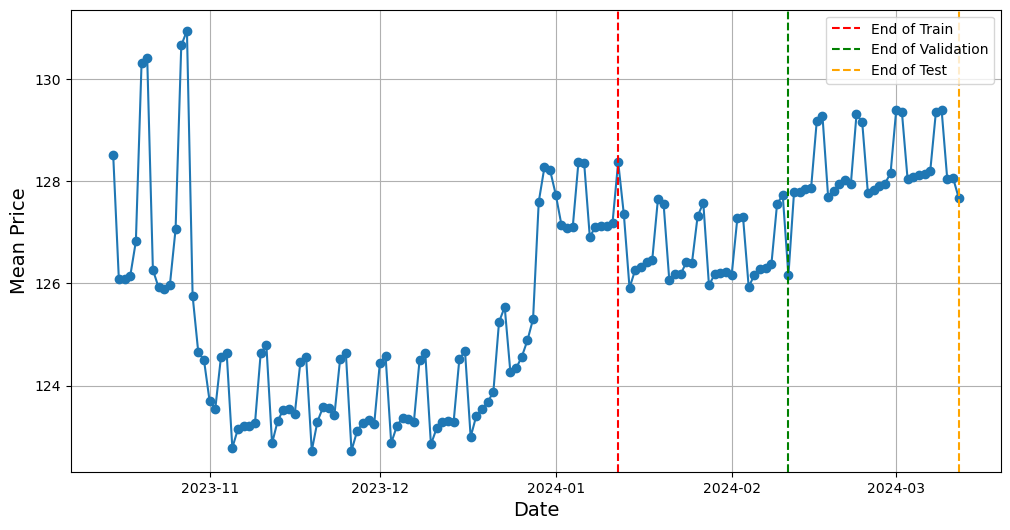

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Group by date and calculate the mean price
mean_price_over_time = combined_data.groupby('date')['price'].mean()

# Ensure the 'date' column in the train, validation, and test datasets are in datetime format
train_data_paris['date'] = pd.to_datetime(train_data_paris['date'])
valid_data_paris['date'] = pd.to_datetime(valid_data_paris['date'])
test_data_paris['date'] = pd.to_datetime(test_data_paris['date'])

# Determine the end dates of the train, validation, and test datasets
end_date_train = train_data_paris['date'].max()
end_date_valid = valid_data_paris['date'].max()
end_date_test = test_data_paris['date'].max()

# Plot the mean price over time
plt.figure(figsize=(12, 6))
plt.plot(mean_price_over_time.index, mean_price_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.grid(True)

# Add vertical lines for the end dates of train, validation, and test datasets
plt.axvline(x=end_date_train, color='r', linestyle='--', label='End of Train')
plt.axvline(x=end_date_valid, color='g', linestyle='--', label='End of Validation')
plt.axvline(x=end_date_test, color='orange', linestyle='--', label='End of Test')

# Add legend to explain the vertical lines
plt.legend()

plt.show()

In [ ]:
combined_data.to_csv('Combined_data_paris.csv', index=False)

In [5]:
# Assuming the necessary imports have been done
# import pandas as pd

# 1. Extract Date and Price Columns
date_price_data = combined_data[['date', 'price']]

# 2. Convert Date to Day of the Week
date_price_data['day_of_week'] = pd.to_datetime(date_price_data['date']).dt.day_name()

# 3. Group By Day of the Week and 4. Calculate Mean Price
average_price_per_day = date_price_data.groupby('day_of_week')['price'].mean().reset_index()

# 5. Output Results
print(average_price_per_day)

  day_of_week       price
0      Friday  126.668525
1      Monday  124.995317
2    Saturday  126.728184
3      Sunday  125.014788
4    Thursday  125.108935
5     Tuesday  125.033223
6   Wednesday  124.975721


C:\Users\anton\AppData\Local\Temp\ipykernel_13696\38797166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_price_data['day_of_week'] = pd.to_datetime(date_price_data['date']).dt.day_name()


In [6]:
# Count the unique IDs in the combined dataset
unique_ids_count = combined_data['id'].nunique()

# Display the count of unique IDs
print(f"Number of unique IDs in the combined dataset: {unique_ids_count}")

Number of unique IDs in the combined dataset: 30788


In [7]:
import pandas as pd

# Assuming the combined_data dataframe is already loaded
# combined_data = pd.read_csv('path_to_combined_data.csv')

# Extract the column names and store them in a set
column_names = list(combined_data.columns)

# Print the set of column names
print(column_names)

['id', 'date', 'available', 'price', 'season_Autumn', 'is_holiday', 'is_school_holiday', 'host_id', 'host_response_time', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'reviews_per_month', 'Hair dryer', 'wifi', 'crib', 'tv', 'parking', 'pool', 'Freezer', 'hot tub', 'bbq', 'Fire extinguisher', 'sauna', 'Cleaning products', 'Hangers', 'Smoke alarm', 'toys children', 'Laundromat nearby', 'Hot water kettle', 'Room-darkening shades', 'Self check-in', 'soap', 'First aid kit', 'clothing storage', 'game console', 'Dryer', 'sound system', 'Free washer – In unit', 'shampoo', 'Washer', 'Essent

In [8]:
import pandas as pd

# Assuming the combined_data dataframe is already loaded
# combined_data = pd.read_csv('path_to_combined_data.csv')

# Count the number of columns starting with 'neighbourhood'
neighbourhood_columns = [col for col in combined_data.columns if col.startswith('neighbourhood')]
count_neighbourhood_columns = len(neighbourhood_columns)

# Print the result
print(f"Number of columns starting with 'neighbourhood': {count_neighbourhood_columns}")

Number of columns starting with 'neighbourhood': 20


In [9]:
import pandas as pd

# Assuming the dataset is already loaded into a DataFrame named 'df'
# Ensure the 'date' column is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Get the first and last date
first_date = combined_data['date'].min()
last_date = combined_data['date'].max()

print(f"First date in the dataset: {first_date}")
print(f"Last date in the dataset: {last_date}")

First date in the dataset: 2023-10-15 00:00:00
Last date in the dataset: 2024-03-12 00:00:00


In [10]:
import pandas as pd

# Assuming train_data_paris, valid_data_paris, and test_data_paris are already defined

# Count the unique IDs in each dataset
train_unique_ids_count = train_data_paris['id'].nunique()
valid_unique_ids_count = valid_data_paris['id'].nunique()
test_unique_ids_count = test_data_paris['id'].nunique()

# Display the count of unique IDs
print(f"Number of unique IDs in the training dataset: {train_unique_ids_count}")
print(f"Number of unique IDs in the validation dataset: {valid_unique_ids_count}")
print(f"Number of unique IDs in the test dataset: {test_unique_ids_count}")

Number of unique IDs in the training dataset: 18533
Number of unique IDs in the validation dataset: 6089
Number of unique IDs in the test dataset: 6166


In [11]:
import pandas as pd

# Assuming train_data_paris, valid_data_paris, and test_data_paris are already defined

# Ensure the 'date' column is in datetime format for each dataset
train_data_paris['date'] = pd.to_datetime(train_data_paris['date'])
valid_data_paris['date'] = pd.to_datetime(valid_data_paris['date'])
test_data_paris['date'] = pd.to_datetime(test_data_paris['date'])

# Get the first and last date for each dataset
train_first_date = train_data_paris['date'].min()
train_last_date = train_data_paris['date'].max()

valid_first_date = valid_data_paris['date'].min()
valid_last_date = valid_data_paris['date'].max()

test_first_date = test_data_paris['date'].min()
test_last_date = test_data_paris['date'].max()

# Display the first and last date for each dataset
print(f"First date in the training dataset: {train_first_date}")
print(f"Last date in the training dataset: {train_last_date}")

print(f"First date in the validation dataset: {valid_first_date}")
print(f"Last date in the validation dataset: {valid_last_date}")

print(f"First date in the test dataset: {test_first_date}")
print(f"Last date in the test dataset: {test_last_date}")

First date in the training dataset: 2023-10-15 00:00:00
Last date in the training dataset: 2024-01-12 00:00:00
First date in the validation dataset: 2024-01-13 00:00:00
Last date in the validation dataset: 2024-02-11 00:00:00
First date in the test dataset: 2024-02-12 00:00:00
Last date in the test dataset: 2024-03-12 00:00:00


# Engineering dataset for baseline models

In [12]:
import pandas as pd
import numpy as np

# Assuming train_data_paris, valid_data_paris, and test_data_paris are already defined

# Set the random seed for reproducibility
np.random.seed(42)

# Extract unique IDs from each dataset
unique_train_ids = train_data_paris['id'].unique()
unique_valid_ids = valid_data_paris['id'].unique()
unique_test_ids = test_data_paris['id'].unique()

# Randomly select 6000 unique IDs for training, 2000 for validation, and 2000 for testing
selected_train_ids = np.random.choice(unique_train_ids, 6000, replace=False)
selected_valid_ids = np.random.choice(unique_valid_ids, 2000, replace=False)
selected_test_ids = np.random.choice(unique_test_ids, 2000, replace=False)

# Ensure IDs are exclusive to each dataset
selected_train_ids = set(selected_train_ids)
selected_valid_ids = set(selected_valid_ids)
selected_test_ids = set(selected_test_ids)

# Filter datasets based on the selected unique IDs
train_data_paris_filtered = train_data_paris[train_data_paris['id'].isin(selected_train_ids)]
valid_data_paris_filtered = valid_data_paris[valid_data_paris['id'].isin(selected_valid_ids)]
test_data_paris_filtered = test_data_paris[test_data_paris['id'].isin(selected_test_ids)]

# Check the amount of unique IDs in the filtered datasets
train_unique_count = len(train_data_paris_filtered['id'].unique())
valid_unique_count = len(valid_data_paris_filtered['id'].unique())
test_unique_count = len(test_data_paris_filtered['id'].unique())

# Display the result
print("Filtered Train Data Info:")
print(train_data_paris_filtered.info())
print(f"Number of unique IDs in filtered train data: {train_unique_count}")

print("\nFiltered Validation Data Info:")
print(valid_data_paris_filtered.info())
print(f"Number of unique IDs in filtered validation data: {valid_unique_count}")

print("\nFiltered Test Data Info:")
print(test_data_paris_filtered.info())
print(f"Number of unique IDs in filtered test data: {test_unique_count}")

Filtered Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 539599 entries, 0 to 1666699
Columns: 127 entries, id to kitchen_amenities
dtypes: bool(97), datetime64[ns](1), float64(10), int64(19)
memory usage: 177.5 MB
None
Number of unique IDs in filtered train data: 6000

Filtered Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 59930 entries, 2 to 182448
Columns: 127 entries, id to kitchen_amenities
dtypes: bool(97), datetime64[ns](1), float64(10), int64(19)
memory usage: 19.7 MB
None
Number of unique IDs in filtered validation data: 2000

Filtered Test Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 59917 entries, 1 to 184702
Columns: 127 entries, id to kitchen_amenities
dtypes: bool(97), datetime64[ns](1), float64(10), int64(19)
memory usage: 19.7 MB
None
Number of unique IDs in filtered test data: 2000


In [13]:
import pandas as pd

# Assuming train_data_paris, valid_data_paris, and test_data_paris are already defined

# Function to count the number of unique days and get the start and end dates in the dataset
def analyze_dates(data):
    unique_days = data['date'].nunique()
    start_date = data['date'].min()
    end_date = data['date'].max()
    return unique_days, start_date, end_date

# Analyze the dates in each dataset
train_unique_days, train_start_date, train_end_date = analyze_dates(train_data_paris_filtered)
valid_unique_days, valid_start_date, valid_end_date = analyze_dates(valid_data_paris_filtered)
test_unique_days, test_start_date, test_end_date = analyze_dates(test_data_paris_filtered)

# Check for overlapping IDs
train_ids = set(train_data_paris_filtered['id'])
valid_ids = set(valid_data_paris_filtered['id'])
test_ids = set(test_data_paris_filtered['id'])

no_overlap_train_valid = train_ids.isdisjoint(valid_ids)
no_overlap_train_test = train_ids.isdisjoint(test_ids)
no_overlap_valid_test = valid_ids.isdisjoint(test_ids)

# Display the results
print(f"Train Data: Unique days: {train_unique_days}, Start date: {train_start_date}, End date: {train_end_date}")
print(f"Validation Data: Unique days: {valid_unique_days}, Start date: {valid_start_date}, End date: {valid_end_date}")
print(f"Test Data: Unique days: {test_unique_days}, Start date: {test_start_date}, End date: {test_end_date}")

print(f"\nNo overlapping IDs between train and validation sets: {no_overlap_train_valid}")
print(f"No overlapping IDs between train and test sets: {no_overlap_train_test}")
print(f"No overlapping IDs between validation and test sets: {no_overlap_valid_test}")

Train Data: Unique days: 90, Start date: 2023-10-15 00:00:00, End date: 2024-01-12 00:00:00
Validation Data: Unique days: 30, Start date: 2024-01-13 00:00:00, End date: 2024-02-11 00:00:00
Test Data: Unique days: 30, Start date: 2024-02-12 00:00:00, End date: 2024-03-12 00:00:00

No overlapping IDs between train and validation sets: True
No overlapping IDs between train and test sets: True
No overlapping IDs between validation and test sets: True


#### Data ready for LSTM model

In [ ]:
train_data_paris_filtered.to_csv('Train_model_Paris_Vince.csv', index=False)
valid_data_paris_filtered.to_csv('Valid_model_Paris_Vince.csv', index=False)
test_data_paris_filtered.to_csv('Test_model_Paris_Vince.csv', index=False)

#### Reading in data with and without LSTM features

In [14]:
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/Train_model_Paris_Vince.csv'
#read data, and quickly check if it is correctly read in
train_data_paris_filtered= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/Valid_model_Paris_Vince.csv'
#read data, and quickly check if it is correctly read in
valid_data_paris_filtered= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/Test_model_Paris_Vince.csv'
#read data, and quickly check if it is correctly read in
test_data_paris_filtered= pd.read_csv(file_path)

In [15]:
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/data met lstm parijs/train_data_lstm_paris_FINAL.csv'
#read data, and quickly check if it is correctly read in
train_data_lstm_paris= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/data met lstm parijs/val_data_lstm_paris_FINAL.csv'
#read data, and quickly check if it is correctly read in
valid_data_lstm_paris= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/data met lstm parijs/test_data_lstm_paris_FINAL.csv'
#read data, and quickly check if it is correctly read in
test_data_lstm_paris= pd.read_csv(file_path)

In [26]:
train_data_lstm_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 143 entries, id to 15
dtypes: bool(97), float64(26), int64(19), object(1)
memory usage: 2.7+ MB


In [27]:
# Step 1: Group the data by 'id'
grouped = train_data_paris_filtered.groupby('id')

# Step 2: Calculate the standard deviation of 'price' for each 'id'
std_per_id = grouped['price'].std()

# Step 3: Calculate the average of these standard deviations
average_std = std_per_id.mean()

print(f"The average standard deviation of price per ID is: {average_std}")

The average standard deviation of price per ID is: 6.110478540885893


#### Selecting last days without the LSTM features 

In [28]:
import pandas as pd

# Assuming train_data_paris, valid_data_paris, and test_data_paris are already defined

# Function to select the last day for each ID in the given dataframe
def select_last_day_per_id(data):
    data = data.sort_values(by=['id', 'date'])
    last_day_data = data.groupby('id').tail(1)
    return last_day_data

# Apply the function to each split
train_data_paris_last_day = select_last_day_per_id(train_data_paris_filtered)
valid_data_paris_last_day = select_last_day_per_id(valid_data_paris_filtered)
test_data_paris_last_day = select_last_day_per_id(test_data_paris_filtered)

# Calculate the total unique IDs across all splits
total_unique_ids = set(train_data_paris_filtered['id']).union(valid_data_paris_filtered['id']).union(test_data_paris_filtered['id'])
total_unique_count = len(total_unique_ids)

# Calculate the percentage of unique IDs in each split based on the total unique IDs
train_unique_count = len(set(train_data_paris_last_day['id']))
valid_unique_count = len(set(valid_data_paris_last_day['id']))
test_unique_count = len(set(test_data_paris_last_day['id']))

train_percentage = (train_unique_count / total_unique_count) * 100
valid_percentage = (valid_unique_count / total_unique_count) * 100
test_percentage = (test_unique_count / total_unique_count) * 100

print("\nPercentage of unique IDs per split:")
print(f"Train: {train_percentage:.2f}%")
print(f"Validation: {valid_percentage:.2f}%")
print(f"Test: {test_percentage:.2f}%")


Percentage of unique IDs per split:
Train: 60.00%
Validation: 20.00%
Test: 20.00%


In [29]:
import pandas as pd

# Function to get the first and last date in the dataset
def get_first_last_dates(data):
    first_date = data['date'].min()
    last_date = data['date'].max()
    return first_date, last_date

# Get the first and last date for each dataset
train_first_date, train_last_date = get_first_last_dates(train_data_paris_last_day)
valid_first_date, valid_last_date = get_first_last_dates(valid_data_paris_last_day)
test_first_date, test_last_date = get_first_last_dates(test_data_paris_last_day)

# Display the results
print(f"Train Data: First date: {train_first_date}, Last date: {train_last_date}")
print(f"Validation Data: First date: {valid_first_date}, Last date: {valid_last_date}")
print(f"Test Data: First date: {test_first_date}, Last date: {test_last_date}")

Train Data: First date: 2024-01-11, Last date: 2024-01-12
Validation Data: First date: 2024-02-10, Last date: 2024-02-11
Test Data: First date: 2024-03-11, Last date: 2024-03-12


In [30]:
train_data_paris_last_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 538567 to 534253
Columns: 127 entries, id to kitchen_amenities
dtypes: bool(97), float64(10), int64(19), object(1)
memory usage: 2.0+ MB


In [ ]:
train_data_paris_last_day.to_csv('Baslinemodels_train_paris.csv', index=False)
valid_data_paris_last_day.to_csv('Baslinemodels_valid_paris.csv', index=False)
test_data_paris_last_day.to_csv('Baslinemodels_test_paris.csv', index=False)

#### With the LSTM features

In [31]:
# Extracting unique IDs from each dataset
train_ids = set(train_data_lstm_paris['id'])
valid_ids = set(valid_data_lstm_paris['id'])
test_ids = set(test_data_lstm_paris['id'])

# Check for overlapping IDs between the datasets
train_valid_overlap = train_ids.intersection(valid_ids)
train_test_overlap = train_ids.intersection(test_ids)
valid_test_overlap = valid_ids.intersection(test_ids)

# Print the results
print(f"Overlapping IDs between train and validation sets: {train_valid_overlap}")
print(f"Number of overlapping IDs between train and validation sets: {len(train_valid_overlap)}\n")

print(f"Overlapping IDs between train and test sets: {train_test_overlap}")
print(f"Number of overlapping IDs between train and test sets: {len(train_test_overlap)}\n")

print(f"Overlapping IDs between validation and test sets: {valid_test_overlap}")
print(f"Number of overlapping IDs between validation and test sets: {len(valid_test_overlap)}\n")

Overlapping IDs between train and validation sets: set()
Number of overlapping IDs between train and validation sets: 0

Overlapping IDs between train and test sets: set()
Number of overlapping IDs between train and test sets: 0

Overlapping IDs between validation and test sets: set()
Number of overlapping IDs between validation and test sets: 0



In [32]:
import pandas as pd

# Function to get the first and last date in the dataset
def get_first_last_dates(data):
    first_date = data['date'].min()
    last_date = data['date'].max()
    return first_date, last_date

# Get the first and last date for each dataset
train_first_date, train_last_date = get_first_last_dates(train_data_lstm_paris)
valid_first_date, valid_last_date = get_first_last_dates(valid_data_lstm_paris)
test_first_date, test_last_date = get_first_last_dates(test_data_lstm_paris)

# Display the results
print(f"Merged Train Data: First date: {train_first_date}, Last date: {train_last_date}")
print(f"Merged Validation Data: First date: {valid_first_date}, Last date: {valid_last_date}")
print(f"Merged Test Data: First date: {test_first_date}, Last date: {test_last_date}")

Merged Train Data: First date: 2024-01-11, Last date: 2024-01-12
Merged Validation Data: First date: 2024-02-10, Last date: 2024-02-11
Merged Test Data: First date: 2024-03-11, Last date: 2024-03-12


In [ ]:
train_data_lstm_paris.to_csv('Baslinemodels_train_lstm_paris.csv', index=False)
valid_data_lstm_paris.to_csv('Baslinemodels_valid_lstm_paris.csv', index=False)
test_data_lstm_paris.to_csv('Baslinemodels_test_lstm_paris.csv', index=False)

#### Check if original dataset and lstm dataset are identical except additional columns

In [33]:
import pandas as pd

# Assuming the dataframes are already loaded
# train_data_lstm_paris = pd.read_csv('path_to_train_data_lstm_paris.csv')
# train_data_paris_last_day = pd.read_csv('path_to_train_data_paris_last_day.csv')

# Get the list of columns to compare, excluding the last 16 columns from train_data_lstm_paris
columns_to_compare = train_data_lstm_paris.columns[:-16]

# Extract the relevant columns from train_data_lstm_paris
trimmed_train_data_lstm_paris = train_data_lstm_paris[columns_to_compare]

# Align dataframes to ensure they have the same order of columns and index
trimmed_train_data_lstm_paris = trimmed_train_data_lstm_paris.reset_index(drop=True)
train_data_paris_last_day = train_data_paris_last_day[columns_to_compare].reset_index(drop=True)

# Compare the dataframes
differences = trimmed_train_data_lstm_paris != train_data_paris_last_day

# Find the indices and columns where differences occur
diff_indices = differences[differences].stack().index.tolist()

if not diff_indices:
    print("The data in train_data_lstm_paris (excluding the last 16 columns) is identical to train_data_paris_last_day.")
else:
    print("Differences found:")
    for index, column in diff_indices:
        lstm_value = trimmed_train_data_lstm_paris.loc[index, column]
        last_day_value = train_data_paris_last_day.loc[index, column]
        print(f"Row {index}, Column '{column}': train_data_lstm_paris = {lstm_value}, train_data_paris_last_day = {last_day_value}")

The data in train_data_lstm_paris (excluding the last 16 columns) is identical to train_data_paris_last_day.


# Baseline models

In [34]:
#WITHOUT LSTM
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_train_paris.csv'
#read data, and quickly check if it is correctly read in
train_data_paris= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_valid_paris.csv'
#read data, and quickly check if it is correctly read in
valid_data_paris= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_test_paris.csv'
#read data, and quickly check if it is correctly read in
test_data_paris= pd.read_csv(file_path)

In [35]:
#WITH LSTM
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_train_lstm_paris.csv'
#read data, and quickly check if it is correctly read in
train_data_lstm_paris= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_valid_lstm_paris.csv'
#read data, and quickly check if it is correctly read in
valid_data_lstm_paris= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_test_lstm_paris.csv'
#read data, and quickly check if it is correctly read in
test_data_lstm_paris= pd.read_csv(file_path)

In [36]:
train_data_lstm_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 143 entries, id to 15
dtypes: bool(97), float64(26), int64(19), object(1)
memory usage: 2.7+ MB


In [37]:
import pandas as pd

# Assuming train_data_lstm_paris, valid_data_lstm_paris, and test_data_lstm_paris are already defined

# Check for NaN values in the train dataset
train_nan_counts = train_data_lstm_paris.isna().sum()
train_columns_with_nan = train_nan_counts[train_nan_counts > 0]
print("Train Data - Columns with NaN values and their counts:")
print(train_columns_with_nan)

# Check for NaN values in the valid dataset
valid_nan_counts = valid_data_lstm_paris.isna().sum()
valid_columns_with_nan = valid_nan_counts[valid_nan_counts > 0]
print("\nValid Data - Columns with NaN values and their counts:")
print(valid_columns_with_nan)

# Check for NaN values in the test dataset
test_nan_counts = test_data_lstm_paris.isna().sum()
test_columns_with_nan = test_nan_counts[test_nan_counts > 0]
print("\nTest Data - Columns with NaN values and their counts:")
print(test_columns_with_nan)

Train Data - Columns with NaN values and their counts:
Series([], dtype: int64)

Valid Data - Columns with NaN values and their counts:
Series([], dtype: int64)

Test Data - Columns with NaN values and their counts:
Series([], dtype: int64)


In [38]:
import pandas as pd

# Assuming train_data_lstm_paris, valid_data_lstm_paris, and test_data_lstm_paris are DataFrames

# Extract IDs from each dataset
train_ids = set(train_data_lstm_paris['id'])
valid_ids = set(valid_data_lstm_paris['id'])
test_ids = set(test_data_lstm_paris['id'])

# Check for overlapping IDs between the datasets
overlap_train_valid = train_ids.intersection(valid_ids)
overlap_train_test = train_ids.intersection(test_ids)
overlap_valid_test = valid_ids.intersection(test_ids)

# Output the results
if not overlap_train_valid and not overlap_train_test and not overlap_valid_test:
    print("IDs are unique across the train, validation, and test datasets.")
else:
    print("There are overlapping IDs between the datasets.")
    if overlap_train_valid:
        print(f"Overlapping IDs between train and validation datasets: {overlap_train_valid}")
    if overlap_train_test:
        print(f"Overlapping IDs between train and test datasets: {overlap_train_test}")
    if overlap_valid_test:
        print(f"Overlapping IDs between validation and test datasets: {overlap_valid_test}")

IDs are unique across the train, validation, and test datasets.


In [39]:
train_data_lstm_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 143 entries, id to 15
dtypes: bool(97), float64(26), int64(19), object(1)
memory usage: 2.7+ MB


In [40]:
# Print a list of all columns in the dataset
columns_list = train_data_lstm_paris.columns.tolist()
print("List of all columns in the dataset:")
print(columns_list)

List of all columns in the dataset:
['id', 'date', 'available', 'price', 'season_Autumn', 'is_holiday', 'is_school_holiday', 'host_id', 'host_response_time', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'reviews_per_month', 'Washer', 'Dryer', 'Essentials', 'Free washer – In unit', 'exercise equipment', 'Dedicated workspace', 'First aid kit', 'Wine glasses', 'Long term stays allowed', 'Dishwasher', 'hot tub', 'Baking sheet', 'Elevator', 'Portable fans', 'Cleaning products', 'Dining table', 'soap', 'tv', 'Iron', 'sauna', 'Heating', 'Drying rack for clothing', 'Private entrance', 'Han

In [41]:
import pandas as pd

# Ensure the 'date' column is in datetime format for each dataset
train_data_lstm_paris['date'] = pd.to_datetime(train_data_lstm_paris['date'])
valid_data_lstm_paris['date'] = pd.to_datetime(valid_data_lstm_paris['date'])
test_data_lstm_paris['date'] = pd.to_datetime(test_data_lstm_paris['date'])

# Get the first and last date for each dataset
train_lstm_first_date = train_data_lstm_paris['date'].min()
train_lstm_last_date = train_data_lstm_paris['date'].max()

valid_lstm_first_date = valid_data_lstm_paris['date'].min()
valid_lstm_last_date = valid_data_lstm_paris['date'].max()

test_lstm_first_date = test_data_lstm_paris['date'].min()
test_lstm_last_date = test_data_lstm_paris['date'].max()

# Display the first and last date for each dataset
print(f"First date in the LSTM training dataset (Paris): {train_lstm_first_date}")
print(f"Last date in the LSTM training dataset (Paris): {train_lstm_last_date}")

print(f"First date in the LSTM validation dataset (Paris): {valid_lstm_first_date}")
print(f"Last date in the LSTM validation dataset (Paris): {valid_lstm_last_date}")

print(f"First date in the LSTM test dataset (Paris): {test_lstm_first_date}")
print(f"Last date in the LSTM test dataset (Paris): {test_lstm_last_date}")

First date in the LSTM training dataset (Paris): 2024-01-11 00:00:00
Last date in the LSTM training dataset (Paris): 2024-01-12 00:00:00
First date in the LSTM validation dataset (Paris): 2024-02-10 00:00:00
Last date in the LSTM validation dataset (Paris): 2024-02-11 00:00:00
First date in the LSTM test dataset (Paris): 2024-03-11 00:00:00
Last date in the LSTM test dataset (Paris): 2024-03-12 00:00:00


In [42]:
import pandas as pd

# Ensure the 'date' column is in datetime format for each dataset
train_data_paris['date'] = pd.to_datetime(train_data_paris['date'])
valid_data_paris['date'] = pd.to_datetime(valid_data_paris['date'])
test_data_paris['date'] = pd.to_datetime(test_data_paris['date'])

# Get the first and last date for each dataset
train_paris_first_date = train_data_paris['date'].min()
train_paris_last_date = train_data_paris['date'].max()

valid_paris_first_date = valid_data_paris['date'].min()
valid_paris_last_date = valid_data_paris['date'].max()

test_paris_first_date = test_data_paris['date'].min()
test_paris_last_date = test_data_paris['date'].max()

# Display the first and last date for each dataset
print(f"First date in the training dataset (Paris): {train_paris_first_date}")
print(f"Last date in the training dataset (Paris): {train_paris_last_date}")

print(f"First date in the validation dataset (Paris): {valid_paris_first_date}")
print(f"Last date in the validation dataset (Paris): {valid_paris_last_date}")

print(f"First date in the test dataset (Paris): {test_paris_first_date}")
print(f"Last date in the test dataset (Paris): {test_paris_last_date}")

First date in the training dataset (Paris): 2024-01-11 00:00:00
Last date in the training dataset (Paris): 2024-01-12 00:00:00
First date in the validation dataset (Paris): 2024-02-10 00:00:00
Last date in the validation dataset (Paris): 2024-02-11 00:00:00
First date in the test dataset (Paris): 2024-03-11 00:00:00
Last date in the test dataset (Paris): 2024-03-12 00:00:00


In [43]:
import pandas as pd

# List of datasets to check
datasets = {
    "Train Data": train_data_lstm_paris,
    "Validation Data": valid_data_lstm_paris,
    "Test Data": test_data_lstm_paris
}

# Loop through each dataset and print the number of missing values per column
for dataset_name, dataset in datasets.items():
    print(f"\nMissing values in {dataset_name}:")
    missing_values_count = dataset.isnull().sum()
    print(missing_values_count[missing_values_count > 0])



Missing values in Train Data:
Series([], dtype: int64)

Missing values in Validation Data:
Series([], dtype: int64)

Missing values in Test Data:
Series([], dtype: int64)


In [44]:
!pip install pickle 

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


## XGB

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm
import pickle

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_paris, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_paris, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_paris, 'price')

# Apply scaling to both features and target
X_train, y_train, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid, y_valid, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test, y_test, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Save the scaler
with open('scaler_without_LSTM.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the scaled datasets
scaled_train_df = pd.DataFrame(X_train, columns=X_train_raw.columns)
scaled_train_df['price'] = y_train
scaled_valid_df = pd.DataFrame(X_valid, columns=X_valid_raw.columns)
scaled_valid_df['price'] = y_valid
scaled_test_df = pd.DataFrame(X_test, columns=X_test_raw.columns)
scaled_test_df['price'] = y_test

scaled_train_df.to_csv('scaled_train_data_without_LSTM.csv', index=False)
scaled_valid_df.to_csv('scaled_valid_data_without_LSTM.csv', index=False)
scaled_test_df.to_csv('scaled_test_data_without_LSTM.csv', index=False)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    model = XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        **param
    )
    
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    rmse = np.sqrt(mse)
    return rmse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    **best_params
)

best_model.fit(X_train, y_train)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train)
y_valid_pred_scaled = best_model.predict(X_valid)
y_test_pred_scaled = best_model.predict(X_test)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'xgb_model_without_lstm_paris.joblib')

# Load the model
loaded_model = joblib.load('xgb_model_without_lstm_paris.joblib')

In [46]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('xgb_model_without_lstm_paris.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  36.644476334253945
Mean Squared Error (MSE):  4924.651669635254
R-squared (R2):  0.7628094884252068

Validation Performance Metrics:
Mean Absolute Error (MAE):  50.85375169754028
Mean Squared Error (MSE):  14177.908055155265
R-squared (R2):  0.47273364627296666

Test Performance Metrics:
Mean Absolute Error (MAE):  48.96247000209584
Mean Squared Error (MSE):  10728.283319639326
R-squared (R2):  0.5272717884651875



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm
import pickle

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets for LSTM data
X_train_raw, y_train_raw = prepare_data(train_data_lstm_paris, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_paris, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_paris, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Save the scaler
with open('scaler_with_LSTM.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the scaled datasets
scaled_train_df = pd.DataFrame(X_train_scaled, columns=X_train_raw.columns)
scaled_train_df['price'] = y_train_scaled
scaled_valid_df = pd.DataFrame(X_valid_scaled, columns=X_valid_raw.columns)
scaled_valid_df['price'] = y_valid_scaled
scaled_test_df = pd.DataFrame(X_test_scaled, columns=X_test_raw.columns)
scaled_test_df['price'] = y_test_scaled

scaled_train_df.to_csv('scaled_train_data_with_LSTM.csv', index=False)
scaled_valid_df.to_csv('scaled_valid_data_with_LSTM.csv', index=False)
scaled_test_df.to_csv('scaled_test_data_with_LSTM.csv', index=False)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    model = XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',  # Use rmse for evaluation
        **param
    )
    
    model.fit(X_train_scaled, y_train_scaled, eval_set=[(X_valid_scaled, y_valid_scaled)], verbose=False)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    rmse = np.sqrt(mse)
    return rmse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',  # Use rmse for evaluation
    **best_params
)

best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with original scale:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'xgb_model_with_lstm_paris.joblib')

# Load the model
loaded_model = joblib.load('xgb_model_with_lstm_paris.joblib')

In [47]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('xgb_model_with_lstm_paris.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  5.96052408472697
Mean Squared Error (MSE):  374.390793724482
R-squared (R2):  0.9819678730904068

Validation Performance Metrics:
Mean Absolute Error (MAE):  5.724660333633423
Mean Squared Error (MSE):  555.5379464371503
R-squared (R2):  0.9793399374410238

Test Performance Metrics:
Mean Absolute Error (MAE):  6.420176711587344
Mean Squared Error (MSE):  406.0239731951797
R-squared (R2):  0.982109068061481



## RF

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping the unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_paris, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_paris, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_paris, 'price')

# Apply scaling to both features and target
X_train, y_train, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid, y_valid, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test, y_test, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 15),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
    }

    model = RandomForestRegressor(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train)
y_valid_pred_scaled = best_model.predict(X_valid)
y_test_pred_scaled = best_model.predict(X_test)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'rf_model_without_lstm_paris.joblib')

# Load the model
loaded_model = joblib.load('rf_model_without_lstm_paris.joblib')

In [48]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('rf_model_without_lstm_paris.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  32.724046259755916
Mean Squared Error (MSE):  5534.215659142715
R-squared (R2):  0.7334504993620159

Validation Performance Metrics:
Mean Absolute Error (MAE):  51.10326043151875
Mean Squared Error (MSE):  15802.573221538216
R-squared (R2):  0.4123135000162994

Test Performance Metrics:
Mean Absolute Error (MAE):  48.02129857291418
Mean Squared Error (MSE):  10614.17164510828
R-squared (R2):  0.5322999748216715



## With LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping the unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_lstm_paris, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_paris, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_paris, 'price')

# Apply scaling to both features and target
X_train, y_train, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid, y_valid, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test, y_test, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 15),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
    }

    model = RandomForestRegressor(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train)
y_valid_pred_scaled = best_model.predict(X_valid)
y_test_pred_scaled = best_model.predict(X_test)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'rf_model_with_lstm_paris.joblib')

# Load the model
loaded_model = joblib.load('rf_model_with_lstm_paris.joblib')

In [49]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('rf_model_with_lstm_paris.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  3.4061853699077593
Mean Squared Error (MSE):  530.1383397866745
R-squared (R2):  0.9744664612941597

Validation Performance Metrics:
Mean Absolute Error (MAE):  4.54619843699643
Mean Squared Error (MSE):  1229.1846222692607
R-squared (R2):  0.9542874949308482

Test Performance Metrics:
Mean Absolute Error (MAE):  5.236758044469782
Mean Squared Error (MSE):  673.2919321240834
R-squared (R2):  0.9703322440850176



## Linear Regression

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping the unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_paris, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_paris, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_paris, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = LinearRegression(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'linear_model_without_lstm_paris.joblib')

# Load the model
loaded_model = joblib.load('linear_model_without_lstm_paris.joblib')

In [50]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('linear_model_without_lstm_paris.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  53.20830629783894
Mean Squared Error (MSE):  11289.73504708572
R-squared (R2):  0.4562421444194311

Validation Performance Metrics:
Mean Absolute Error (MAE):  867934133434.1613
Mean Squared Error (MSE):  7.533096599801085e+23
R-squared (R2):  -2.8015052439322178e+19

Test Performance Metrics:
Mean Absolute Error (MAE):  56.180906888999424
Mean Squared Error (MSE):  12370.961783025354
R-squared (R2):  0.4548892432818694



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets for LSTM data
X_train_raw, y_train_raw = prepare_data(train_data_lstm_paris, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_paris, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_paris, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Since there are no hyperparameters to tune, we use a default Linear Regression model
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'linear_model_with_lstm_paris.joblib')

# Load the model
loaded_model = joblib.load('linear_model_with_lstm_paris.joblib')

In [51]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('linear_model_with_lstm_paris.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  10.281503537495931
Mean Squared Error (MSE):  702.106766822049
R-squared (R2):  0.9661837883419315

Validation Performance Metrics:
Mean Absolute Error (MAE):  83094481508.14015
Mean Squared Error (MSE):  6.904692857106648e+21
R-squared (R2):  -2.5678063450608582e+17

Test Performance Metrics:
Mean Absolute Error (MAE):  14.03146406734691
Mean Squared Error (MSE):  1306.7497741671293
R-squared (R2):  0.9424197268788839



## Ridge Regression

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_paris, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_paris, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_paris, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.1, 10.0, log=True)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = Ridge(alpha=alpha, fit_intercept=fit_intercept)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = Ridge(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'ridge_model_without_lstm_paris.joblib')

# Load the model
loaded_model = joblib.load('ridge_model_without_lstm_paris.joblib')

In [52]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('ridge_model_without_lstm_paris.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  53.18006378830149
Mean Squared Error (MSE):  11299.356514865816
R-squared (R2):  0.4557787368491186

Validation Performance Metrics:
Mean Absolute Error (MAE):  55.61447095693617
Mean Squared Error (MSE):  16437.879021016783
R-squared (R2):  0.38868692752834333

Test Performance Metrics:
Mean Absolute Error (MAE):  55.898151322699725
Mean Squared Error (MSE):  12256.985072927606
R-squared (R2):  0.45991148260160264



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_lstm_paris, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_paris, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_paris, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 0.1, 10.0, log=True)
    }

    model = Ridge(**param)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters and train the final model
best_params = study.best_params
best_model = Ridge(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'ridge_model_with_lstm_paris.joblib')

# Load the model
loaded_model = joblib.load('ridge_model_with_lstm_paris.joblib')

In [53]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('ridge_model_with_lstm_paris.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  10.28374110924471
Mean Squared Error (MSE):  702.3771922797861
R-squared (R2):  0.9661707635927784

Validation Performance Metrics:
Mean Absolute Error (MAE):  10.214476216342952
Mean Squared Error (MSE):  999.2229068741456
R-squared (R2):  0.9628396081693811

Test Performance Metrics:
Mean Absolute Error (MAE):  13.664691546415881
Mean Squared Error (MSE):  1277.9300037084263
R-squared (R2):  0.943689633548933



## Lasso Regression

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_paris, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_paris, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_paris, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 0.0001, 1.0, log=True)
    }

    model = Lasso(**param)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = Lasso(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'lasso_model_without_lstm_paris.joblib')

# Load the model
loaded_model = joblib.load('lasso_model_without_lstm_paris.joblib')

In [54]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('lasso_model_without_lstm_paris.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  53.145316412638486
Mean Squared Error (MSE):  11296.659317336738
R-squared (R2):  0.45590864444556545

Validation Performance Metrics:
Mean Absolute Error (MAE):  55.487909473116126
Mean Squared Error (MSE):  16420.79654318927
R-squared (R2):  0.38932221277364876

Test Performance Metrics:
Mean Absolute Error (MAE):  55.83596047165522
Mean Squared Error (MSE):  12229.334267126262
R-squared (R2):  0.46112988032512625



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_lstm_paris, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_paris, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_paris, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 0.0001, 1.0, log=True)
    }

    model = Lasso(**param)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters and train the final model
best_params = study.best_params
best_model = Lasso(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'lasso_model_with_lstm_paris.joblib')

# Load the model
loaded_model = joblib.load('lasso_model_with_lstm_paris.joblib')

In [55]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('lasso_model_with_lstm_paris.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  10.722141422180352
Mean Squared Error (MSE):  873.2135584240644
R-squared (R2):  0.9579426151267284

Validation Performance Metrics:
Mean Absolute Error (MAE):  9.38527162861414
Mean Squared Error (MSE):  1306.5462942201807
R-squared (R2):  0.9514104691715397

Test Performance Metrics:
Mean Absolute Error (MAE):  10.300418526276566
Mean Squared Error (MSE):  1123.0592430004783
R-squared (R2):  0.9505138173952414

